In [181]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
from time import time

In [276]:
def StrassenDot(A,B,n):
#     n=np.shape(A)
#     n=n[0]
    if n==2:
        nn=1
        a1=(A[0,0]+A[1,1])*(B[0,0]+B[1,1])
        a2=(A[1,0]+A[1,1])*(B[0,0])
        a3=(A[0,0])*(B[0,1]-B[1,1])
        a4=(A[1,1])*(B[1,0]-B[0,0])
        a5=(A[0,0]+A[0,1])*(B[1,1])
        a6=(A[1,0]-A[0,0])*(B[0,0]+B[0,1])
        a7=(A[0,1]-A[1,1])*(B[1,0]+B[1,1])
    else:
        nn=n/2
        a1=StrassenDot(A[0:nn,0:nn]+A[nn:n,nn:n],B[0:nn,0:nn]+B[nn:n,nn:n],nn)
        a2=StrassenDot(A[nn:n,0:nn]+A[nn:n,nn:n],B[0:nn,0:nn],nn)
        a3=StrassenDot(A[0:nn,0:nn],B[0:nn,nn:n]-B[nn:n,nn:n],nn)
        a4=StrassenDot(A[nn:n,nn:n],B[nn:n,0:nn]-B[0:nn,0:nn],nn)
        a5=StrassenDot(A[0:nn,0:nn]+A[0:nn,nn:n],B[nn:n,nn:n],nn)
        a6=StrassenDot(A[nn:n,0:nn]-A[0:nn,0:nn],B[0:nn,0:nn]+B[0:nn,nn:n],nn)
        a7=StrassenDot(A[0:nn,nn:n]-A[nn:n,nn:n],B[nn:n,0:nn]+B[nn:n,nn:n],nn)
        
    C=np.empty((n,n))
    C[0:nn,0:nn]=a1+a4-a5+a7
    C[0:nn,nn:n]=a3+a5
    C[nn:n,0:nn]=a2+a4
    C[nn:n,nn:n]=a1+a3-a2+a6
    
    return C

In [ ]:
# p=2
# n=np.power(2,p)
nn=[2,4,8,16,32,64,128,256,512,1024]
ns=np.size(nn)
e=np.zeros(ns)
ts=np.zeros(ns)
td=np.zeros(ns)
for k in xrange(ns):
    n=nn[k]
    print(n)
    A=np.zeros((n,n))
    B=np.zeros((n,n))
    for i in xrange(n):
        for j in xrange(n):
            A[i][j]=np.random.rand() # 1.0/(i+j+1.0)
            B[i][j]=np.random.rand()
#     B=lin.inv(A)
    C=np.zeros((n,n))
    
    tic=time()
    C=StrassenDot(A,B,n)
    toc=time()
    ts[k]=toc-tic
    
    tic=time()
    D=np.dot(A,B)
    toc=time()
    td[k]=toc-tic
    
    e[k]=lin.norm(C-D)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[  5.55111512e-17   1.30775601e-15   1.06071338e-14   5.54133655e-14
   5.00669571e-13   2.65586021e-12   2.74580969e-11   1.47624327e-10
   1.02021655e-09   7.67673718e-09]
 
[  1.17063522e-04   8.02993774e-04   4.14109230e-03   2.23269463e-02
   1.03005886e-01   7.38220215e-01   6.03032398e+00   3.37140460e+01
   2.36052858e+02   1.65326267e+03]
 
[  2.78949738e-04   2.31266022e-05   9.05990601e-06   3.19480896e-05
   5.38825989e-05   5.91278076e-05   2.98976898e-04   1.06287003e-03
   6.05487823e-03   4.54678535e-02]


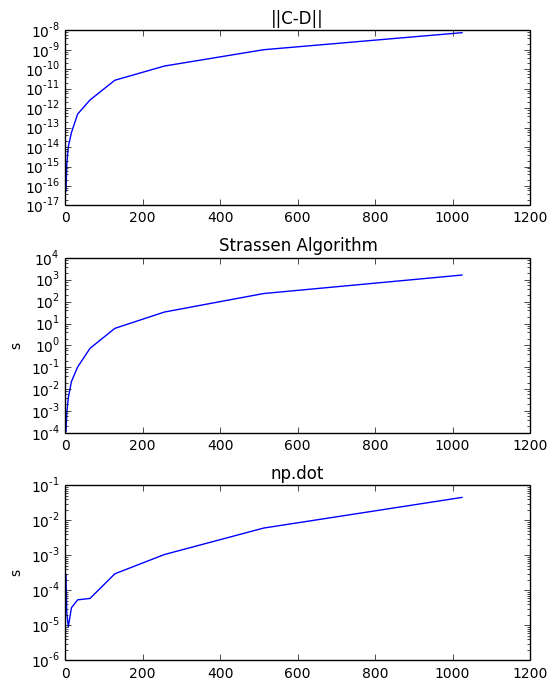

In [288]:
print(nn)
print(e)
print(' ')
print(ts)
print(' ')
print(td)

plt.subplots_adjust(top=1.7,hspace=0.3)
plt.subplot(311)
plt.title('||C-D||')
plt.semilogy(nn,e)
plt.subplot(312)
plt.title('Strassen Algorithm')
plt.ylabel('s')
plt.semilogy(nn,ts)
plt.subplot(313)
plt.title('np.dot')
plt.ylabel('s')
plt.semilogy(nn,td)